# Customer Churn

A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.
Your task as a data scientist would be to predict the propensity to churn for each customer.
Data Dictionary
There are multiple variables in the dataset which can be cleanly divided into 3 categories:
I. Demographic information about customers
•	customer_id - Customer id 
•	vintage - Vintage of the customer with the bank in a number of days 
•	age - Age of customer 
•	gender - Gender of customer 
•	dependents - Number of dependents 
•	occupation - Occupation of the customer 
•	city - City of the customer (anonymized) 
II. Customer Bank Relationship
•	customer_nw_category - Net worth of customer (3: Low 2: Medium 1: High) 
•	branch_code - Branch Code for a customer account 
•	days_since_last_transaction - No of Days Since Last Credit in Last 1 year 
III. Transactional Information
•	current_balance - Balance as of today 
•	previous_month_end_balance - End of Month Balance of previous month 
•	average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter 
•	average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to the previous quarter 
•	current_month_credit - Total Credit Amount current month 
•	previous_month_credit - Total Credit Amount previous month 
•	current_month_debit - Total Debit Amount current month 
•	previous_month_debit - Total Debit Amount previous month 
•	current_month_balance - Average Balance of current month 
•	previous_month_balance - Average Balance of previous month 
•	churn - Average balance of customer falls below minimum balance in the next quarter (1/0) 

### Hypothesis

job type: if a customer dont have stable job then that can lead to the churn.
Education: if a customer is uneducated then this have more chances that they don't know about minimum balence policy.
previous trasaction history: with help of this parameter we will predict the future behaviour of customer.
Dependent: if a no. of dependent is high then it is more likely to falls the balence below minimum range.
Occupation: This will also impact on customer churn.
customer net worth: the customers who have low income will also keep their balence below minimum amount.

In [108]:
import pandas as pd

In [109]:
Churn_data=pd.read_csv('D:\Internshala Trianing\Machine Laerning\Final project problem statement and dataset\churn_prediction.csv')

In [110]:
Churn_data.shape

(28382, 21)

In [111]:
Churn_data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [112]:
Churn_data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [113]:
Churn_data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

## Univarient Analysis

In [114]:
Churn_data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


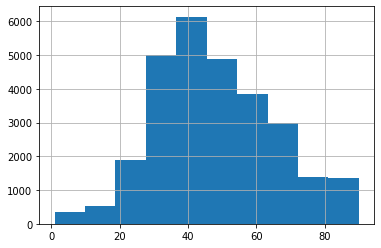

In [115]:
Churn_data['age'].hist()

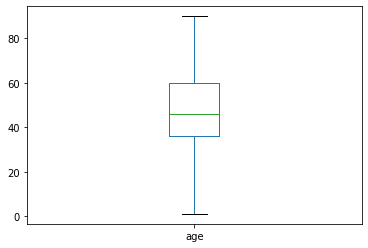

In [116]:
Churn_data['age'].plot.box()

In [117]:
Churn_data['gender'].value_counts()/len(Churn_data)*100

Male      58.304559
Female    39.845677
Name: gender, dtype: float64

In [118]:
Churn_data['occupation'].value_counts()/len(Churn_data)*100

self_employed    61.574237
salaried         23.620605
student           7.251075
retired           7.131280
company           0.140934
Name: occupation, dtype: float64

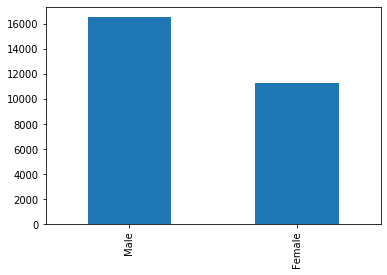

In [119]:
Churn_data['gender'].value_counts().plot.bar()

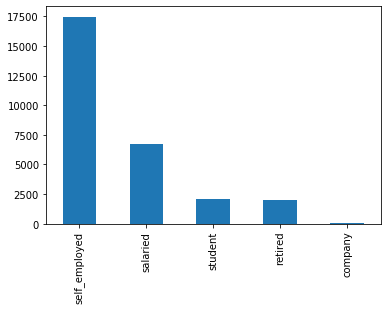

In [120]:
Churn_data['occupation'].value_counts().plot.bar()

## Bivarient Analysis

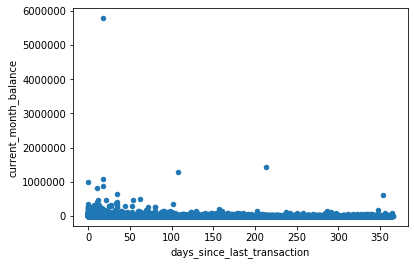

In [121]:
Churn_data.plot.scatter('days_since_last_transaction','current_month_balance')

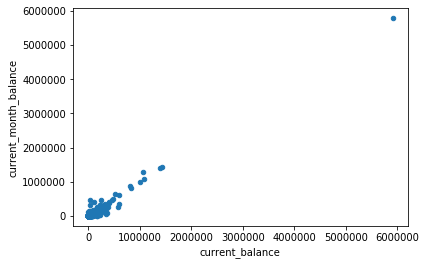

In [122]:
Churn_data.plot.scatter('current_balance','current_month_balance')

In [123]:
Churn_data.corr()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006093,-0.000442,-0.008616,0.000743,0.009618,-0.000286,0.010267,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006093,1.000000,0.227390,0.036987,0.044200,-0.167366,-0.380714,-0.088744,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
age,-0.000442,0.227390,1.000000,-0.000612,0.015439,-0.076532,-0.058990,-0.016679,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.008616,0.036987,-0.000612,1.000000,0.001892,0.013134,0.020141,-0.079834,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.033487
city,0.000743,0.044200,0.015439,0.001892,1.000000,0.006613,-0.061234,-0.004309,-0.005654,-0.004089,-0.006298,-0.007891,0.004118,0.008087,0.001465,0.005995,-0.005796,-0.005839,-0.001585
customer_nw_category,0.009618,-0.167366,-0.076532,0.013134,0.006613,1.000000,0.235059,0.049531,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,-0.380714,-0.058990,0.020141,-0.061234,0.235059,1.000000,0.038708,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,0.010267,-0.088744,-0.016679,-0.079834,-0.004309,0.049531,0.038708,1.000000,-0.019990,-0.014400,-0.012709,-0.006384,-0.033131,-0.071657,-0.039165,-0.070192,-0.017837,-0.011738,-0.055830
current_balance,0.006589,0.002986,0.054346,-0.003070,-0.005654,-0.058314,0.000181,-0.019990,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.004518,0.058342,0.000216,-0.004089,-0.059854,0.000214,-0.014400,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886


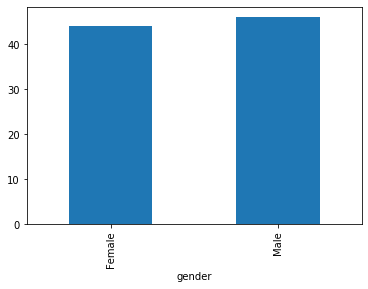

In [124]:
Churn_data.groupby('gender')['age'].median().plot.bar()

In [125]:
from scipy.stats import ttest_ind

In [126]:
males=Churn_data[Churn_data['gender']=='Male']
female=Churn_data[Churn_data['gender']=='Female']

In [127]:
ttest_ind(males['age'],female['age'],nan_policy='omit')

Ttest_indResult(statistic=9.596318583925742, pvalue=8.953496870492096e-22)

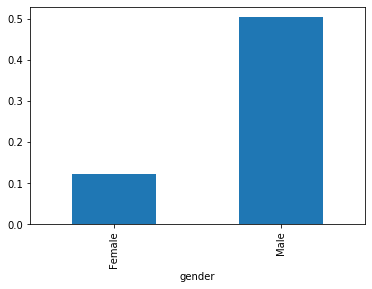

In [128]:
Churn_data.groupby('gender')['dependents'].mean().plot.bar()

In [129]:
ttest_ind(males['dependents'],female['dependents'],nan_policy='omit')

Ttest_indResult(statistic=30.408481173214508, pvalue=1.49406134536556e-199)

In [130]:
pd.crosstab(Churn_data['gender'],Churn_data['churn'])

churn,0,1
gender,,
Female,9324,1985
Male,13379,3169


In [131]:
from scipy.stats import chi2_contingency

In [132]:
chi2_contingency(pd.crosstab(Churn_data['gender'],Churn_data['churn']))

(11.270738823296812,
 0.0007873838498074115,
 1,
 array([[ 9216.65028539,  2092.34971461],
        [13486.34971461,  3061.65028539]]))

## Missing Value Tratement

In [133]:
Churn_data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [138]:
Churn_data['gender'].fillna(Churn_data['gender'].mode()[0],inplace=True)

In [139]:
Churn_data['dependents'].fillna(0,inplace=True)

In [140]:
Churn_data['occupation'].fillna(Churn_data['occupation'].mode()[0],inplace=True)

In [141]:
Churn_data['city'].fillna(Churn_data['city'].mode()[0],inplace=True)

In [142]:
Churn_data['days_since_last_transaction'].fillna(Churn_data['days_since_last_transaction'].median(),inplace=True)

In [143]:
Churn_data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [144]:
bins=[0,18,60,90]
groups=['children','adult','senior_citizen']
Churn_data['Age_type']=pd.cut(Churn_data['age'],bins,labels=groups)

In [145]:
Churn_data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Age_type
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,senior_citizen
1,2,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,adult
2,4,2356,31,Male,0.0,salaried,146.0,2,41,30.0,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,adult
3,5,478,90,Male,0.0,self_employed,1020.0,2,582,147.0,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,senior_citizen
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,adult


In [147]:
Churn_data.drop_duplicates()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Age_type
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,senior_citizen
1,2,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,adult
2,4,2356,31,Male,0.0,salaried,146.0,2,41,30.0,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,adult
3,5,478,90,Male,0.0,self_employed,1020.0,2,582,147.0,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,senior_citizen
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,children
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,adult
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,adult
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,30.0,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,adult


In [156]:
Churn_data=Churn_data.astype({'dependents':'object','customer_nw_category':'object'})

In [160]:
Churn_data=Churn_data.drop(['customer_id'],axis=1)

In [162]:
Churn_data.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Age_type
0,3135,66,Male,0,self_employed,187.0,2,755,224.0,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,senior_citizen
1,310,35,Male,0,self_employed,1020.0,2,3214,60.0,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,adult
2,2356,31,Male,0,salaried,146.0,2,41,30.0,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,adult
3,478,90,Male,0,self_employed,1020.0,2,582,147.0,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,senior_citizen
4,2531,42,Male,2,self_employed,1494.0,3,388,58.0,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,adult


## Building First Benchmark Model

In [163]:
from sklearn.utils import shuffle

In [164]:
Churn_data=shuffle(Churn_data,random_state=50)
div=int(Churn_data.shape[0]/4)

train=Churn_data.loc[:3*div]
test=Churn_data.loc[3*div:]
train.shape, test.shape

((26127, 21), (2256, 21))

In [165]:
test['Simple_mode']=train['churn'].mode()[0]

C:\Users\shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [166]:
test['Simple_mode'].head()

21285    0
17769    0
26512    0
19827    0
19762    0
Name: Simple_mode, dtype: int64

In [167]:
from sklearn.metrics import accuracy_score

In [168]:
simple_mode_accuracy=accuracy_score(test['churn'],test['Simple_mode'])
simple_mode_accuracy

0.8191489361702128

In [169]:
test['gender_mode']=test['churn']
for i in Churn_data['gender'].unique():
    test['gender_mode'][test['gender']==str(i)]=train['churn'][train['gender']==str(i)].mode()[0]

C:\Users\shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shree\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas

In [172]:
gender_acc=accuracy_score(test['churn'],test['gender_mode'])
gender_acc

0.8191489361702128

## Dicision Tree

In [11]:
import pandas as pd

In [12]:
Churn_data=pd.read_csv('D:\Internshala Trianing\Machine Laerning\Final project problem statement and dataset\churn_prediction.csv')

In [13]:
Churn_data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [14]:
Churn_data['Gender_nan']=Churn_data['gender'].isnull()*1
Churn_data['dependents_nan']=Churn_data['dependents'].isnull()*1
Churn_data['occupation_nan']=Churn_data['occupation'].isnull()*1
Churn_data['city_nan']=Churn_data['city'].isnull()*1
Churn_data['days_since_last_transaction_nan']=Churn_data['days_since_last_transaction'].isnull()*1

In [15]:
Churn_data['gender'].fillna(Churn_data['gender'].mode()[0],inplace=True)
Churn_data['dependents'].fillna(0,inplace=True)
Churn_data['occupation'].fillna(Churn_data['occupation'].mode()[0],inplace=True)
Churn_data['city'].fillna(Churn_data['city'].mode()[0],inplace=True)
Churn_data['days_since_last_transaction'].fillna(Churn_data['days_since_last_transaction'].median(),inplace=True)

In [16]:
bins=[0,18,60,90]
groups=['children','adult','senior_citizen']
Churn_data['Age_type']=pd.cut(Churn_data['age'],bins,labels=groups)

In [17]:
Churn_data=Churn_data.drop(['customer_id'],axis=1)

In [19]:
Churn_data.isnull().sum()

vintage                            0
age                                0
gender                             0
dependents                         0
occupation                         0
city                               0
customer_nw_category               0
branch_code                        0
days_since_last_transaction        0
current_balance                    0
previous_month_end_balance         0
average_monthly_balance_prevQ      0
average_monthly_balance_prevQ2     0
current_month_credit               0
previous_month_credit              0
current_month_debit                0
previous_month_debit               0
current_month_balance              0
previous_month_balance             0
churn                              0
Gender_nan                         0
dependents_nan                     0
occupation_nan                     0
city_nan                           0
days_since_last_transaction_nan    0
Age_type                           0
dtype: int64

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
Churn_data=pd.get_dummies(Churn_data)

In [31]:
Churn_data.head()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,Age_type_children,Age_type_adult,Age_type_senior_citizen
0,3135,66,0.0,187.0,2,755,224.0,1458.71,1458.71,1458.71,...,0,1,0,0,0,1,0,0,0,1
1,310,35,0.0,1020.0,2,3214,60.0,5390.37,8704.66,7799.26,...,0,1,0,0,0,1,0,0,1,0
2,2356,31,0.0,146.0,2,41,30.0,3913.16,5815.29,4910.17,...,0,1,0,0,1,0,0,0,1,0
3,478,90,0.0,1020.0,2,582,147.0,2291.91,2291.91,2084.54,...,0,1,0,0,0,1,0,0,0,1
4,2531,42,2.0,1494.0,3,388,58.0,927.72,1401.72,1643.31,...,0,1,0,0,0,1,0,0,1,0


In [33]:
Scaler=MinMaxScaler()
Churn_scale=Scaler.fit_transform(Churn_data)

In [35]:
Churn_data=pd.DataFrame(Churn_scale,columns=Churn_data.columns)

In [36]:
Churn_data

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,Age_type_children,Age_type_adult,Age_type_senior_citizen
0,0.232330,0.730337,0.000000,0.113402,0.5,0.157708,0.613699,0.001178,0.000802,0.000005,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.010221,0.382022,0.000000,0.618557,0.5,0.672035,0.164384,0.001843,0.002064,0.001118,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.171083,0.337079,0.000000,0.088539,0.5,0.008366,0.082192,0.001593,0.001561,0.000611,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.023430,1.000000,0.000000,0.618557,0.5,0.121523,0.402740,0.001319,0.000947,0.000115,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.184842,0.460674,0.038462,0.906004,1.0,0.080945,0.158904,0.001088,0.000792,0.000038,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,0.130907,0.101124,0.000000,0.618557,0.5,0.252248,0.191781,0.001113,0.000736,0.000150,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
28378,0.372592,0.370787,0.000000,0.634324,0.5,0.046434,0.038356,0.001581,0.001257,0.000393,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
28379,0.009199,0.516854,0.000000,0.664645,0.5,0.122778,0.000000,0.012013,0.011172,0.009127,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28380,0.189087,0.550562,0.057692,0.739236,1.0,0.057101,0.082192,0.001206,0.000831,0.000045,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [39]:
x=Churn_data.drop(['churn'],axis=1)
y=Churn_data['churn']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
train_x,test_x,train_y,test_y=train_test_split(x, y, random_state=50, stratify=y)

In [42]:
train_y.value_counts()/len(train_y)

0.0    0.814667
1.0    0.185333
Name: churn, dtype: float64

In [43]:
test_y.value_counts()/len(test_x)

0.0    0.814684
1.0    0.185316
Name: churn, dtype: float64

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
des=DecisionTreeClassifier()

In [91]:
des.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
des.score(train_x,train_y)

1.0

In [93]:
des.score(test_x,test_y)

0.7887542277339347

In [103]:
def Des_check(k):
    train_score=[]
    test_score=[]
    for i in k:
        des=DecisionTreeClassifier(max_depth=i)
        des.fit(train_x,train_y)
        train_score.append(des.score(train_x,train_y))
        test_score.append(des.score(test_x,test_y))
    return train_score,test_score

In [104]:
k=range(1,30)

In [105]:
train_score,test_score=Des_check(k)

In [106]:
import matplotlib.pyplot as plt

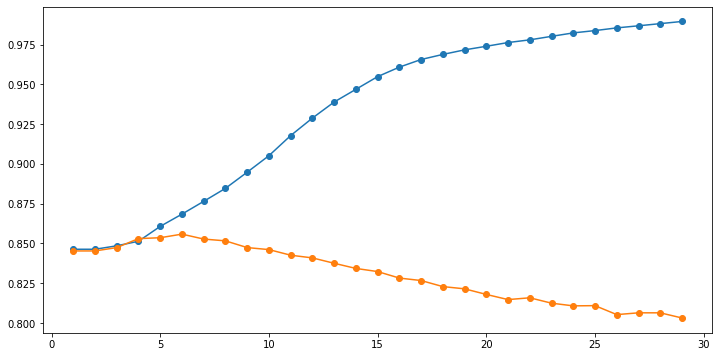

In [107]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),train_score, marker='o')
plt.plot(range(1,30),test_score, marker='o')

In [111]:
des=DecisionTreeClassifier(max_depth=6)

In [112]:
des.fit(train_x,train_y)
train_sc=des.score(train_x,train_y)
test_sc=des.score(test_x,test_y)

In [113]:
train_sc,test_sc

(0.8684111622662783, 0.8561161217587373)

## Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
des=RandomForestClassifier(max_depth=6)

In [156]:
des.fit(train_x,train_y)

C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
des.score(train_x,train_y)

0.8583106267029973

In [158]:
des.score(test_x,test_y)

0.8493517474633596

In [153]:
pd.Series(des.feature_importances_, index=train_x.columns)

vintage                            0.013978
age                                0.003306
dependents                         0.001553
city                               0.003507
customer_nw_category               0.002253
branch_code                        0.009736
days_since_last_transaction        0.008534
current_balance                    0.364645
previous_month_end_balance         0.058217
average_monthly_balance_prevQ      0.028814
average_monthly_balance_prevQ2     0.053962
current_month_credit               0.025591
previous_month_credit              0.015124
current_month_debit                0.092469
previous_month_debit               0.069025
current_month_balance              0.185801
previous_month_balance             0.052128
Gender_nan                         0.000190
dependents_nan                     0.000372
occupation_nan                     0.000000
city_nan                           0.000278
days_since_last_transaction_nan    0.005119
gender_Female                   